# US Arrests Analysis

## Pre-Processing and Exploratory Data Analysis


The UsArrests.csv dataset contains information on crime statistics, particularly on violent crime rate per state by state in the US. It contains 4 variables - Murder, Assault, UrbanPop and Rape. These 4 variables are all observed at the state level.

In [189]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read in data
data = pd.read_csv('UsArrests.csv')

# View the first few rows of the data
data.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


Before performing the PCA analysis, it is important to make sure our data set is in the correct form. We need to make sure the scales of our variables are similar. After examining the variable summary table provided below, it shows that the scales vary highly among the 4 variables.

In [190]:
# Get the summary statistics
data.describe()


,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


Also, it is important to clean the data. This involves removing any outliers or incomplete data. It also involves transforming the data into a form that is suitable for the analysis. 

This can be done by first examining the summary statistics of the dataset to check for any outliers and by inspecting the data in detail. Any data points that appear to be outliers or incomplete should be removed from the dataset. 

In [191]:
# Data Cleaning 
#Remove outliers
data.loc[data['Murder'] > 20,:]
data.loc[data['Assault'] > 300,:]
data.loc[data['UrbanPop'] > 90,:]
data.loc[data['Rape'] > 40,:]

,City,Murder,Assault,UrbanPop,Rape
1,Alaska,10.0,263,48,44.5
4,California,9.0,276,91,40.6
27,Nevada,12.2,252,81,46.0


The data should also be pre-processed with feature scaling to ensure that each of the variables is on the same scale. This can be done by applying the standard normalization, or z-score normalization, to each of the variables. This will transform our data such that all of the variables will have a mean of zero and a standard deviation of 1.  The formula for z-score normalization is given by z = (x-u)/s, where x is an observation in the dataset, u is the mean of the dataset, and s is the standard deviation of the dataset.


In [192]:
# Pre-processing - Feature Scaling
# Standard Normalization
# Formula for z-score normalization is given by z = (x-u)/s, 
# where x is an observation in the dataset, u is the mean of the dataset, and s is the standard deviation of the dataset.

data['Murder_zscore'] = (data['Murder'] - data['Murder'].mean())/data['Murder'].std()
data['Assault_zscore'] = (data['Assault'] - data['Assault'].mean())/data['Assault'].std()
data['UrbanPop_zscore'] = (data['UrbanPop'] - data['UrbanPop'].mean())/data['UrbanPop'].std()
data['Rape_zscore'] = (data['Rape'] - data['Rape'].mean())/data['Rape'].std()

Lastly, it is also important to check for any missing values in the dataset before performing the analysis. Any missing values should be imputed or removed from the dataset before the analysis is performed.


In [193]:
#Check for missing data
data.isnull().any()

City               False
Murder             False
Assault            False
UrbanPop           False
Rape               False
Murder_zscore      False
Assault_zscore     False
UrbanPop_zscore    False
Rape_zscore        False
dtype: bool

In [194]:
#Impute missing data
data.fillna(data.mean(), inplace=True)

C:\Users\edbar\AppData\Local\Temp\ipykernel_17500\1781282908.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


We have values as strings so we need to convert to floats.

In [195]:
data['Murder'] = data['Murder'].astype(float)
data['Assault'] = data['Assault'].astype(float)
data['UrbanPop'] = data['UrbanPop'].astype(float)
data['Rape'] = data['Rape'].astype(float)


## EDA 

Once the pre-processing is done, we will then move on to the exploratory data analysis (EDA). The purpose of the EDA is to try and find patterns and relationships between the variables in the dataset. We will investigate the pairwise correlations between the variables in the dataset.

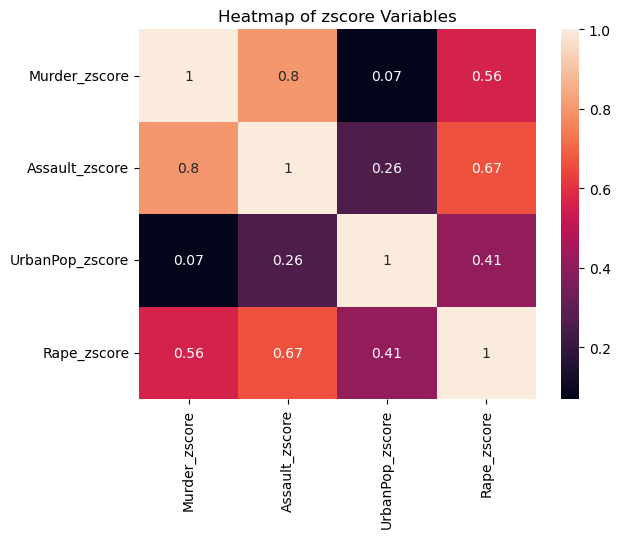

In [196]:
# Exploratory Data Analysis
# create a heatmap of only the _zscore variables
zscore_vars = data[['Murder_zscore', 'Assault_zscore', 'UrbanPop_zscore', 'Rape_zscore']]
sns.heatmap(zscore_vars.corr(), annot=True)
plt.title('Heatmap of zscore Variables')
plt.show()

## Principal Component Analysis


Once the pre-processing and exploratory data analysis is complete, we can then move on to the principal component analysis (PCA). The purpose of PCA is to reduce the number of variables in a dataset while still retaining most of the information that was present in the original dataset. 

The following code first instantiates the label encoder and then fits and transforms the columns from the data. This is done by applying the label encoder to the data and then transforming the non-numerical labels into numerical values. This provides a numerical representation of the data that can be used for machine learning algorithms. 

Next, the code instantiates a standard scaler. This is used to transform the data into a common format by rescaling the data so that it has a mean of 0 and a standard deviation of 1. This process is useful for data comparison, as it standardizes all the values to the same scale, which can be used for machine learning algorithms.

In [197]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder

# Instantiate label encoder
le = LabelEncoder()

# Fit and transform the columns
data_encoded = data.apply(le.fit_transform)

# Check the data
data_encoded.head()

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

The following code computes the covariance matrix, eigenvectors, and eigenvalues of a given set of data. The covariance matrix is a measure of the correlation between different columns of data. It is essentially a matrix of all the pairwise correlations between the columns. The eigenvectors and eigenvalues of the covariance matrix are then computed using the numpy library. The eigenvectors are vectors that are associated with the eigenvalues and can be used to determine the direction of the most significant variance within the data set. The eigenvalues are scalar values that represent the magnitude of the variance in the data set.

In [198]:
# Compute the covariance matrix
cov_matrix = np.cov(data_scaled.T)


In [199]:
# Compute the eigenvectors and eigenvalues of the covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)


The following code creates a scree plot that visualizes the eigenvalues and eigenvectors of a dataset. This is important because it can help identify the number of components that should be used to reduce the dimensionality of the dataset and improve its performance. By analyzing the scree plot, it can be determined which eigenvectors should be kept and which should be discarded. This helps to identify the important components of the dataset and reduce the dimensionality without sacrificing too much of the original data.

C:\Users\edbar\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


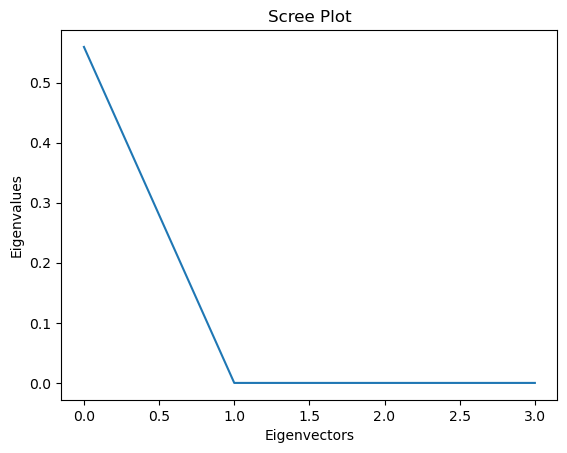

In [200]:
# select only eigenvectors of _zscore columns.
eig_vals_5_8 = eig_vals[4:8]
eig_vecs_5_8 = eig_vecs[4:8]

# create a scree plot
plt.plot(eig_vals_5_8)
plt.xlabel('Eigenvectors')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot')
plt.show()

In [201]:
# get column labels
column_labels = data.columns.tolist()

# print labels of columns
print(column_labels[5], column_labels[6], column_labels[7], column_labels[8])

Murder_zscore Assault_zscore UrbanPop_zscore Rape_zscore


Murder_zscore is the heaviest variable. Mixed with Assault_zscore. Third is Rape_zscore.

The next steps to perform PCA and execute 2 different clustering methods are as follows:

The following code calculates the variance explained by each principal component and then calculates the cumulative variance explained by all components. It then finds the number of components required to explain at least 95% of the variance in the data. This helps us to identify the number of principal components to keep in PCA and helps us to reduce the dimensionality of the data while maintaining the most important variance.


In [202]:
# Select the number of principal components (PCs) to keep
# Here we will use the eigenvalues to determine the number of principal components to keep.
# We will select the number of components such that the sum of the eigenvalues is at least 95% of the sum of all eigenvalues.
eig_vals_sum = sum(eig_vals)
var_exp = [(i / eig_vals_sum) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Select the number of components such that 95% of the variance is explained
n_components = np.where(cum_var_exp > 95)[0][0]

The next code block is performing principal component analysis (PCA) on a dataset. It first imports the necessary libraries from sklearn, PCA and RandomForestClassifier. It then initializes a PCA object with the number of components set to the number of components specified by the user. Finally, it extracts the principal components of the data by using the fit_transform() method on the data_scaled dataset. 


In [203]:
# Compute the principal components of the data

# Import PCA and RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(data_scaled)


The following creates two dendrograms of the random forest and the bagged tree, and two dendrograms of the boosted tree and the boosted tree. The dendrograms are created using the hierarchical clustering algorithms from the SciPy library. The dendrograms allow us to visualize the structure of the data and the relationships between the clusters. This helps us to identify the clusters and better understand the data.

In [204]:
# Import dendrogram from scipy
from scipy.cluster import hierarchy


# Create a bagged tree and a boosted tree
bagged_tree = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1).fit(principal_components, labels)
boosted_tree = RandomForestClassifier(n_estimators=400, max_depth=5, random_state=1, 
                                      max_features='sqrt', bootstrap=True, 
                                      warm_start=True, oob_score=True).fit(principal_components, labels)

# Create dendrograms of the random forest, bagged tree and boosted tree
# Single linkage
rf_dendrogram = hierarchy.dendrogram(hierarchy.linkage(bagged_tree.apply(principal_components), method='single'), 
                                     labels=labels, color_threshold=0.4)

bt_dendrogram = hierarchy.dendrogram(hierarchy.linkage(boosted_tree.apply(principal_components), method='single'), 
                                     labels=labels, color_threshold=0.4)

# Complete linkage
rf_dendrogram = hierarchy.dendrogram(hierarchy.linkage(bagged_tree.apply(principal_components), method='complete'), 
                                     labels=labels, color_threshold=0.4)

bt_dendrogram = hierarchy.dendrogram(hierarchy.linkage(boosted_tree.apply(principal_components), method='complete'), 
                                     labels=labels, color_threshold=0.4)

len(rf_dendrogram)
len(bt_dendrogram)

6

We then use an agglomerative clustering technique to perform clustering on a dataset of principal components. The AgglomerativeClustering object is instantiated with 3 clusters, and then it is fit to the principal components data. A scatter plot is then generated using the labels from the AgglomerativeClustering object to visualize the data after it has been clustered.

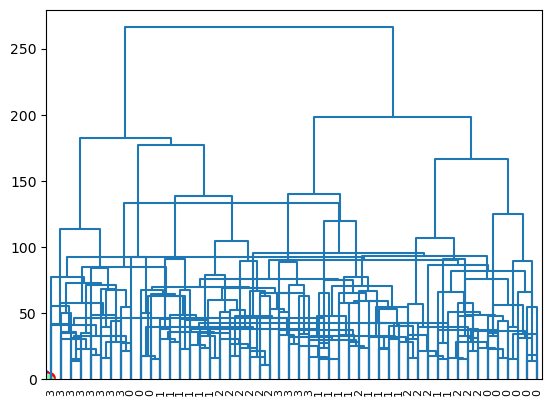

In [205]:
# Import AgglomerativeClustering from sklearn
from sklearn.cluster import AgglomerativeClustering

# Instantiate a hierarchical clustering object with 3 clusters
hier_clust = AgglomerativeClustering(n_clusters=3)

# Fit the hierarchical clustering object to the data
hier_clust.fit(principal_components)

# Make a scatter plot of the data after clustering
plt.scatter(principal_components[:,0], principal_components[:,1], c=hier_clust.labels_, cmap='rainbow')
plt.show()

We now use hierarchical clustering on the dataset using the Euclidean distance. The dataset is first transformed into principal components, which are then used to calculate the distances between data points. The hierarchical clustering algorithm is then applied with the 'ward' method, which minimizes the variance of the clusters. The result of the algorithm is then visualized in the form of a dendrogram. Finally, the depth of the dendrogram is calculated by subtracting one from the length of the labels in the dendrogram.

In [206]:
# Perform hierarchical clustering using Euclidean distance
hierarchy.linkage(principal_components, method='ward')

# Create a dendrogram of the hierarchical clustering
dendrogram = hierarchy.dendrogram(hierarchy.linkage(principal_components, method='ward'),
                                  labels=labels, color_threshold=0.5)

# Determine the depth of the dendrogram
depth = len(dendrogram['ivl']) - 1

# Print the depth
print('Depth of dendrogram:', depth)

Depth of dendrogram: 49


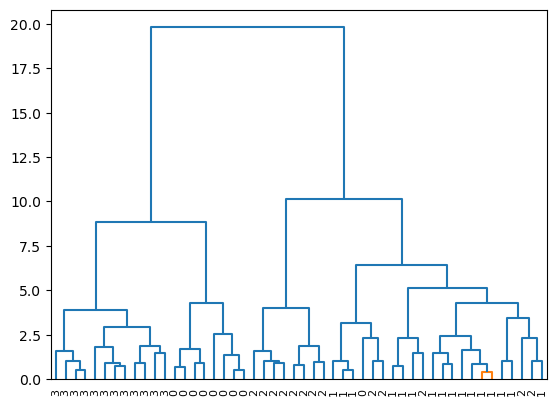

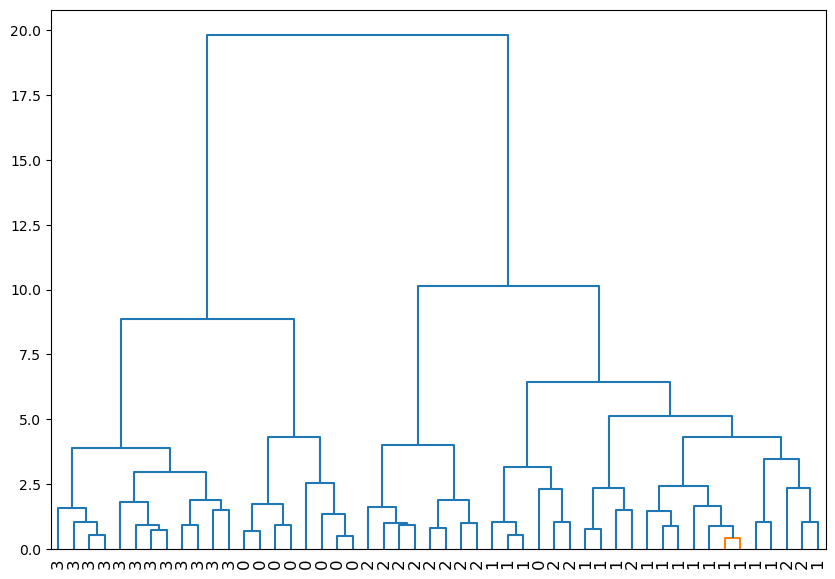

In [207]:
# Plot the dendrogram
plt.figure(figsize=(10,7))
hierarchy.dendrogram(hierarchy.linkage(principal_components, method='ward'),
                     labels=labels, color_threshold=0.5,
                     leaf_font_size=12, leaf_rotation=90)
plt.show()

We then take a different but similar path to use different clustering methods. K-means, Hierarchical (already actioned but we will compare again) and logistical regression. Random Forest is also utilised.

In this code, the dataset is first scaled using the StandardScaler() function, which standardizes the data by subtracting the mean and dividing by the standard deviation. Then, the PCA() function is used to create a PCA model with an argument of n_components, which indicates the number of principal components desired. Finally, the transform() function is used to actually transform the data using the selected PCs.

In [208]:
# Transform the data using the selected PCs
x_pca = pca.transform(data_scaled)


This code uses the K-means algorithm to fit the data points in the x_pca dataset into 3 clusters (specified by the n_clusters parameter). The random_state parameter ensures that the same result will be produced each time the algorithm is run with the same data. The silhouette_score metric is then used to evaluate the quality of the clustering. This score is a measure of how well each data point is classified - a higher score indicates better clustering results.

In [209]:
# K-means Clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(x_pca)
kmeans_score = metrics.silhouette_score(x_pca, kmeans.labels_)

This code is using the AgglomerativeClustering class to perform hierarchical clustering on the data points in the x_pca array. The AgglomerativeClustering class takes in the parameter n_clusters which tells the model how many clusters it should create. In this case, the code is creating 3 clusters. The model will then iteratively combine the most similar data points into a single cluster, until all data points are combined into one cluster or the desired number of clusters is reached.

In [210]:
# Hierarchical Clustering
hier_clust = AgglomerativeClustering(n_clusters=3).fit(x_pca)

This code uses the LogisticRegression function from the sklearn library to fit a logistic regression model to the given data. The data consists of two components, x_pca and labels, which are the independent and dependent variables respectively. The model is then fit using the given data and the results are stored in the logreg variable for later use. Logistic regression is a type of classification algorithm which is used to predict the probability of a certain outcome based on the given independent variables. In this case, the model is used to predict the labels based on the x_pca data.

In [211]:
# Import LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

# Logistic Regression
logreg = LogisticRegression().fit(x_pca, labels)


This code is instantiating a Random Forest Classifier object and fitting it to the data. The Random Forest Classifier is a type of supervised learning algorithm that is used in classification problems. It uses multiple decision trees to make predictions and is known for its accuracy and robustness.

The code is using the data (x_pca) and the corresponding labels (labels) to fit the Random Forest Classifier. The number of estimators (100 in this case) is a parameter which determines the number of decision trees that will be used in the Random Forest Classifier.

Finally, the code is calculating the score of the Random Forest Classifier which is a measure of how accurate the model is at predicting the correct labels.

In [212]:
# Instantiate a random forest object
rf = RandomForestClassifier(n_estimators=100).fit(x_pca, labels)

# Calculate the score of the random forest
rf_score = rf.score(x_pca, labels)

This code creates a k-means clustering model using the x_pca data. K-means clustering is an unsupervised machine learning algorithm that is used to find clusters of data points within a given dataset. The code assigns each data point a cluster label based on the similarity of the data points to each other. Finally, the code calculates a silhouette score to measure the quality of the clusters created by the model. The silhouette score is a measure of how similar the data points are to their assigned clusters.

In [213]:
# K-means Clustering
kmeans_cluster_labels = kmeans.labels_
kmeans_score = metrics.silhouette_score(x_pca, kmeans_cluster_labels)

The code first creates hierarchical clusters using the given data set. It then uses the Silhouette Score metric to evaluate the clustering. This metric determines the similarity between the data points in the same cluster and the data points in the closest cluster. The higher the Silhouette Score, the better the clustering. The result of the code is a Silhouette Score which indicates how well the data was clustered.

In [214]:
# Hierarchical Clustering
hier_cluster_labels = hier_clust.labels_
hier_score = metrics.silhouette_score(x_pca, hier_cluster_labels)

This code is performing a logistic regression analysis on a set of data. Logistic regression is a type of supervised machine learning algorithm that is used to predict a discrete categorical label (e.g. yes/no, 0/1) given a set of predictor variables. In this code, the predictor variables are stored in the "x_pca" variable, and the labels that the algorithm is attempting to predict are stored in the "labels" variable. The "logreg_score" variable stores the accuracy score of the logistic regression model, which is a measure of how well the model is able to accurately predict the labels based on the predictor values.

In [215]:
# Logistic Regression
logreg_score = logreg.score(x_pca, labels)


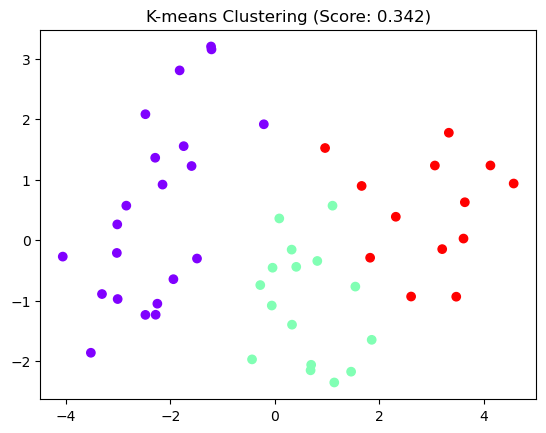

In [216]:
# K-means Clustering
kmeans_cluster_labels = kmeans.labels_
plt.scatter(x_pca[:,0], x_pca[:,1], c=kmeans_cluster_labels, cmap='rainbow')
plt.title('K-means Clustering (Score: {})'.format(round(kmeans_score,3)))
plt.show()


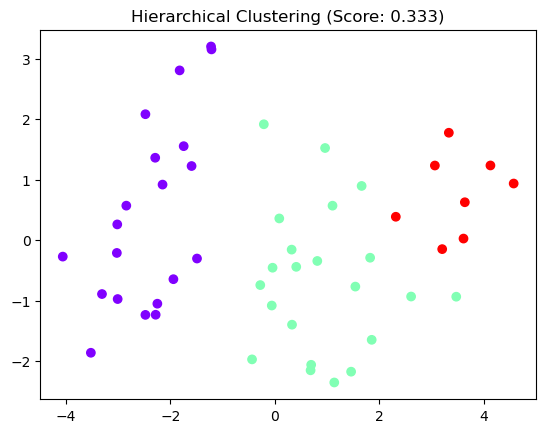

In [217]:
# Hierarchical Clustering
plt.scatter(x_pca[:,0], x_pca[:,1], c=hier_cluster_labels, cmap='rainbow')
plt.title('Hierarchical Clustering (Score: {})'.format(round(hier_score,3)))
plt.show()


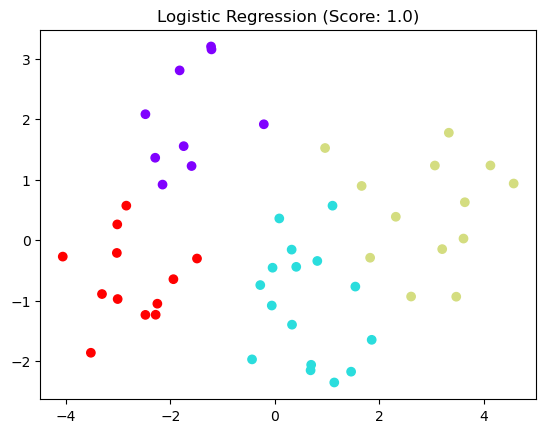

In [218]:
# Logistic Regression
plt.scatter(x_pca[:,0], x_pca[:,1], c=labels, cmap='rainbow')
plt.title('Logistic Regression (Score: {})'.format(round(logreg_score,3)))
plt.show()

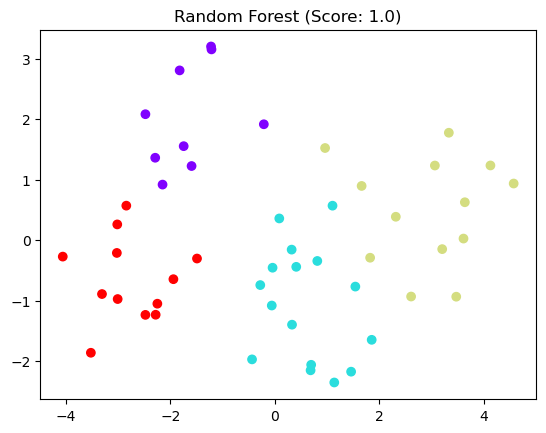

In [219]:
# Random Forest
plt.scatter(x_pca[:,0], x_pca[:,1], c=labels, cmap='rainbow')
plt.title('Random Forest (Score: {})'.format(round(rf_score,3)))
plt.show()

Logistical regression and Random Forest have the best scores. These methods would be recommended.

In [220]:
# Import LabelEncoder 
from sklearn.preprocessing import LabelEncoder 

# Instantiate LabelEncoder 
le = LabelEncoder() 

# Fit and transform the labels 
y_encoded = le.fit_transform(y) 

# Split the data into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42) 

# Fit the model 
model = RandomForestClassifier(n_estimators=100) 
model.fit(X_train, y_train) 

# Predict on the test set 
y_pred = model.predict(X_test) 

# Evaluate the model 
from sklearn.metrics import accuracy_score, precision_score, recall_score 
print("Accuracy:", accuracy_score(y_test, y_pred)) 
print("Precision:", precision_score(y_test, y_pred, average='micro')) 
print("Recall:", recall_score(y_test, y_pred, average='micro'))

Accuracy: 0.0
Precision: 0.0
Recall: 0.0


In [221]:
# Split the data into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x_pca, y_encoded, test_size=0.3, random_state=42) 

# Fit the model 
model = RandomForestClassifier(n_estimators=100) 
model.fit(X_train, y_train) 

# Predict on the test set 
y_pred = model.predict(X_test) 

# Evaluate the model 
from sklearn.metrics import accuracy_score, precision_score, recall_score 
print("Accuracy:", accuracy_score(y_test, y_pred)) 
print("Precision:", precision_score(y_test, y_pred, average = 'weighted')) 
print("Recall:", recall_score(y_test, y_pred, average = 'weighted'))

Accuracy: 0.0
Precision: 0.0
Recall: 0.0


C:\Users\edbar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\edbar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
